## 1. Swedish Demographic Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

### a) Read in the table under "Befolkningsstatistik sedan 1900" into a DataFrame

In [37]:
link = "https://sv.wikipedia.org/wiki/Sveriges_demografi"
dem = pd.read_html(link, match="Födda")[0] #If we do not use [0], it will not become a dataframe, because we get a list when doing this (in this case a list with one element)
dem.head()

,Unnamed: 0,Folkmängd,Födda,Döda,Befolkningsförändringar,Nativiteten (per 1000),Dödstalen (per 1000),Befolkningsförändringar (per 1000),Total fertilitet
0,1900,5 117 000,138 139,86 146,51 993,270,168,102,402
1,1901,5 156 000,139 370,82 772,56 598,270,161,110,404
2,1902,5 187 000,137 364,79 722,57 642,265,154,111,395
3,1903,5 210 000,133 896,78 610,55 286,257,151,106,382
4,1904,5 241 000,134 952,80 152,54 800,257,153,105,383


### b) Choose to do some EDA (exploratory data analysis) on this dataset. And draw some relevant graphs.

In [3]:
dem.info() #Folkmängd, födda, döda and befolkningsförändringare are objects and not int64
#Unnamed: 0 should be year

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 9 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Unnamed: 0                          121 non-null    int64 
 1   Folkmängd                           121 non-null    object
 2   Födda                               121 non-null    object
 3   Döda                                121 non-null    object
 4   Befolkningsförändringar             121 non-null    object
 5   Nativiteten (per 1000)              121 non-null    int64 
 6   Dödstalen (per 1000)                121 non-null    int64 
 7   Befolkningsförändringar (per 1000)  121 non-null    int64 
 8   Total fertilitet                    121 non-null    int64 
dtypes: int64(5), object(4)
memory usage: 8.6+ KB


In [4]:
dem.describe()

,Unnamed: 0,Nativiteten (per 1000),Dödstalen (per 1000),Befolkningsförändringar (per 1000),Total fertilitet
count,121.000000,121.000000,121.000000,121.000000,121.000000
mean,1960.000000,157.107438,112.966942,44.057851,225.388430
std,35.073732,46.409913,18.267427,33.705414,65.906673
min,1900.000000,100.000000,87.000000,-7.000000,150.000000
25%,1930.000000,119.000000,100.000000,22.000000,179.000000
50%,1960.000000,144.000000,108.000000,35.000000,200.000000
75%,1990.000000,181.000000,118.000000,64.000000,243.000000
max,2020.000000,270.000000,180.000000,119.000000,404.000000


In [5]:
#Remove spaces
dem.loc[:, ["Folkmängd", "Födda", "Döda", "Befolkningsförändringar"]] = dem.loc[:,["Folkmängd", "Födda", "Döda", "Befolkningsförändringar"]].apply(lambda x: x.str.replace(" ", ""))
dem.head()

,Unnamed: 0,Folkmängd,Födda,Döda,Befolkningsförändringar,Nativiteten (per 1000),Dödstalen (per 1000),Befolkningsförändringar (per 1000),Total fertilitet
0,1900,5117000,138139,86146,51993,270,168,102,402
1,1901,5156000,139370,82772,56598,270,161,110,404
2,1902,5187000,137364,79722,57642,265,154,111,395
3,1903,5210000,133896,78610,55286,257,151,106,382
4,1904,5241000,134952,80152,54800,257,153,105,383


In [6]:
#Change to int
dem = dem.astype({"Folkmängd":int, "Födda":int, "Döda":int, "Befolkningsförändringar":int})
dem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 9 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Unnamed: 0                          121 non-null    int64
 1   Folkmängd                           121 non-null    int64
 2   Födda                               121 non-null    int64
 3   Döda                                121 non-null    int64
 4   Befolkningsförändringar             121 non-null    int64
 5   Nativiteten (per 1000)              121 non-null    int64
 6   Dödstalen (per 1000)                121 non-null    int64
 7   Befolkningsförändringar (per 1000)  121 non-null    int64
 8   Total fertilitet                    121 non-null    int64
dtypes: int64(9)
memory usage: 8.6 KB


In [7]:
#Renname the Unnamed: 0 column
dem = dem.rename({"Unnamed: 0": "År"}, axis=1)
dem.head()

,År,Folkmängd,Födda,Döda,Befolkningsförändringar,Nativiteten (per 1000),Dödstalen (per 1000),Befolkningsförändringar (per 1000),Total fertilitet
0,1900,5117000,138139,86146,51993,270,168,102,402
1,1901,5156000,139370,82772,56598,270,161,110,404
2,1902,5187000,137364,79722,57642,265,154,111,395
3,1903,5210000,133896,78610,55286,257,151,106,382
4,1904,5241000,134952,80152,54800,257,153,105,383


In [8]:
dem.describe()

,År,Folkmängd,Födda,Döda,Befolkningsförändringar,Nativiteten (per 1000),Dödstalen (per 1000),Befolkningsförändringar (per 1000),Total fertilitet
count,121.000000,1.210000e+02,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000
mean,1960.000000,7.436239e+06,111215.925620,82021.132231,29219.338843,157.107438,112.966942,44.057851,225.388430
std,35.073732,1.432004e+06,14806.054124,9503.678548,18754.952133,46.409913,18.267427,33.705414,65.906673
min,1900.000000,5.117000e+06,85020.000000,63741.000000,-6553.000000,100.000000,87.000000,-7.000000,150.000000
25%,1930.000000,6.131000e+06,98463.000000,73267.000000,15171.000000,119.000000,100.000000,22.000000,179.000000
50%,1960.000000,7.480000e+06,110192.000000,80026.000000,27126.000000,144.000000,108.000000,35.000000,200.000000
75%,1990.000000,8.559000e+06,121679.000000,91074.000000,43908.000000,181.000000,118.000000,64.000000,243.000000
max,2020.000000,1.037930e+07,139505.000000,104594.000000,64967.000000,270.000000,180.000000,119.000000,404.000000


### c) Now we want to go backwards in time (before 1900) to see how population has changed in Sweden. Read in the table under history and keep the data of "Folkmängd" from 1570-1865.

In [9]:
dem_older = pd.read_html(link, match="Vid utgången av år")[0]
dem_older.head()

Vid utgången av år  Folkmängd Årlig tillväxt         
  Vid utgången av år  Folkmängd         Totalt Promille
0               1570    900 000              —        —
1               1650  1 225 000          4 063      386
2               1700  1 485 000          5 200      386
3               1720  1 350 000         −6 750    −4,75
4               1755  1 878 000         15 086      948

In [10]:
dem_older.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 4 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   (Vid utgången av år, Vid utgången av år)  11 non-null     object
 1   (Folkmängd, Folkmängd)                    11 non-null     object
 2   (Årlig tillväxt, Totalt)                  9 non-null      object
 3   (Årlig tillväxt, Promille)                9 non-null      object
dtypes: object(4)
memory usage: 480.0+ bytes


In [11]:
dem_older = dem_older.iloc[:7, :2]
dem_older = dem_older.droplevel(0, axis=1)
dem_older = dem_older.rename({"Vid utgången av år": "År"}, axis=1)
dem_older

,År,Folkmängd
0,1570,900 000
1,1650,1 225 000
2,1700,1 485 000
3,1720,1 350 000
4,1755,1 878 000
5,1815,2 465 000
6,1865,4 099 000


In [12]:
dem_older.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   År         7 non-null      object
 1   Folkmängd  7 non-null      object
dtypes: object(2)
memory usage: 240.0+ bytes


In [13]:
dem_older["Folkmängd"] = dem_older["Folkmängd"].str.replace("\xa0","")
dem_older = dem_older.astype({"År":int, "Folkmängd":int})

In [14]:
#A space is represented by \xa0
dem_older["Folkmängd"].iloc[1] #Checks how the value is represented

1225000

In [15]:
dem_older.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   År         7 non-null      int64
 1   Folkmängd  7 non-null      int64
dtypes: int64(2)
memory usage: 240.0 bytes


In [16]:
dem_full = pd.concat([dem_older, dem]).reset_index(drop=True)
dem_full.head(10)

,År,Folkmängd,Födda,Döda,Befolkningsförändringar,Nativiteten (per 1000),Dödstalen (per 1000),Befolkningsförändringar (per 1000),Total fertilitet
0,1570,900000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1650,1225000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1700,1485000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1720,1350000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1755,1878000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1815,2465000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1865,4099000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1900,5117000,138139.0,86146.0,51993.0,270.0,168.0,102.0,402.0
8,1901,5156000,139370.0,82772.0,56598.0,270.0,161.0,110.0,404.0
9,1902,5187000,137364.0,79722.0,57642.0,265.0,154.0,111.0,395.0


<AxesSubplot:xlabel='År', ylabel='Folkmängd'>

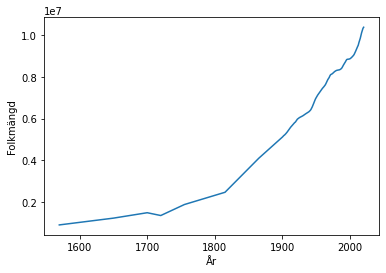

In [17]:
sns.lineplot(data=dem_full, x="År", y="Folkmängd")

## 2. Denmark demographic data

### a) Read in the table under "Demografiske data" into a DataFrame.

In [18]:
link = "https://da.wikipedia.org/wiki/Danmarks_demografi"
dem_den = pd.read_html(link, match="År")[0]
dem_den

,År,Befolkning pr. 1. januar,År.1,Befolkning pr. 1. januar.1
0,800,500.000[5],NaN,NaN
1,1200,1.000.000[5],NaN,NaN
2,1769,797.584,1976.0,5.065.313
3,1787,841.806,1977.0,5.079.879
4,1801,929.001,1978.0,5.096.959
5,1834,1.230.964,1979.0,5.111.537
6,1840,1.289.075,1980.0,5.122.065
7,1845,1.356.877,1981.0,5.123.989
8,1850,1.414.648,1982.0,5.119.155
9,1855,1.507.222,1983.0,5.116.464


In [19]:
dem_den.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   År                          34 non-null     int64  
 1   Befolkning pr. 1. januar    34 non-null     object 
 2   År.1                        32 non-null     float64
 3   Befolkning pr. 1. januar.1  32 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 1.2+ KB


### b) Clean the data and draw a graph of population against year from 1769-2020. 

In [20]:
dem_den = pd.DataFrame({"År":dem_den["År"].append(dem_den["År.1"]).reset_index(drop=True), "Folkmängd":dem_den["Befolkning pr. 1. januar"].append(dem_den["Befolkning pr. 1. januar.1"]).reset_index(drop=True)})

In [21]:
print(len(dem_den["År"]))
dem_den.info()

68
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   År         66 non-null     float64
 1   Folkmängd  66 non-null     object 
dtypes: float64(1), object(1)
memory usage: 1.2+ KB


In [22]:
dem_den = dem_den.dropna()
len(dem_den)

66

In [23]:
dem_den["Folkmängd"] = dem_den["Folkmängd"].str.replace(".", "").str.replace("\[5\]", "") #We have to use backslash to "escape" the paranthesis, so that replace understands that they are simple characters
print(dem_den)

        År Folkmängd
0    800.0    500000
1   1200.0   1000000
2   1769.0    797584
3   1787.0    841806
4   1801.0    929001
..     ...       ...
63  2003.0   5383507
64  2005.0   5411405
65  2010.0   5534738
66  2015.0   5659715
67  2020.0   5822763

[66 rows x 2 columns]


/var/folders/11/k_09161j4vnft7tn925fp6600000gn/T/ipykernel_2150/455329678.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dem_den["Folkmängd"] = dem_den["Folkmängd"].str.replace(".", "").str.replace("\[5\]", "") #We have to use backslash to "escape" the paranthesis, so that replace understands that they are simple characters
/var/folders/11/k_09161j4vnft7tn925fp6600000gn/T/ipykernel_2150/455329678.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  dem_den["Folkmängd"] = dem_den["Folkmängd"].str.replace(".", "").str.replace("\[5\]", "") #We have to use backslash to "escape" the paranthesis, so that replace understands that they are simple characters


In [24]:
dem_den = dem_den.astype({"År":int, "Folkmängd":int})
dem_den.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66 entries, 0 to 67
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   År         66 non-null     int64
 1   Folkmängd  66 non-null     int64
dtypes: int64(2)
memory usage: 1.5 KB


<AxesSubplot:xlabel='År', ylabel='Folkmängd'>

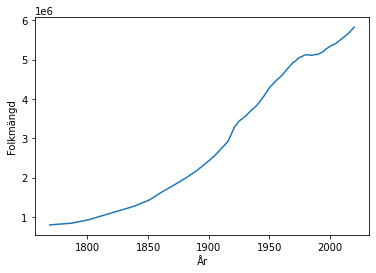

In [25]:
sns.lineplot(data=dem_den.iloc[2:], x="År", y="Folkmängd")

## 3. Norwegian demographic data

### a) Read in the table under "Befolkningsstatistik sedan 1900" into a DataFrame.

In [26]:
link = "https://sv.wikipedia.org/wiki/Norges_demografi"
dem_nor = pd.read_html(link, match="Födelsetal per 1000 invånare", thousands=" ", decimal=",")[0] #We specify how thousands are represented 

In [27]:
dem_nor.head()

,Unnamed: 0,Befolkning i tusentals (x 1000),Födda,Döda,Naturlig förändring,Födelsetal per 1000 invånare,Dödstal per 1000 invånare,Naturlig förändring per 1000 invånare,Total fertilitet
0,1900,2231,66229,35345,30884,29.7,15.8,13.8,NaN
1,1901,2255,67303,33821,33482,29.8,15.0,14.8,NaN
2,1902,2276,66494,31670,34824,29.2,13.9,15.3,NaN
3,1903,2288,65470,33847,31623,28.6,14.8,13.8,NaN
4,1904,2298,64143,32895,31248,27.9,14.3,13.6,NaN


In [28]:
dem_nor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 9 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Unnamed: 0                             113 non-null    int64  
 1   Befolkning i tusentals (x 1000)        113 non-null    int64  
 2   Födda                                  113 non-null    int64  
 3   Döda                                   113 non-null    int64  
 4   Naturlig förändring                    113 non-null    int64  
 5   Födelsetal per 1000 invånare           113 non-null    float64
 6   Dödstal per 1000 invånare              113 non-null    float64
 7   Naturlig förändring per 1000 invånare  113 non-null    float64
 8   Total fertilitet                       85 non-null     float64
dtypes: float64(4), int64(5)
memory usage: 8.1 KB


In [29]:
dem_nor = dem_nor.rename({"Unnamed: 0":"År"}, axis=1)
dem_nor.head()

,År,Befolkning i tusentals (x 1000),Födda,Döda,Naturlig förändring,Födelsetal per 1000 invånare,Dödstal per 1000 invånare,Naturlig förändring per 1000 invånare,Total fertilitet
0,1900,2231,66229,35345,30884,29.7,15.8,13.8,NaN
1,1901,2255,67303,33821,33482,29.8,15.0,14.8,NaN
2,1902,2276,66494,31670,34824,29.2,13.9,15.3,NaN
3,1903,2288,65470,33847,31623,28.6,14.8,13.8,NaN
4,1904,2298,64143,32895,31248,27.9,14.3,13.6,NaN


### b) You see some missing data in column "Total fertilitet". Go to the English page and read in the data from "Vital statistics since 1900".

In [30]:
link = "https://en.wikipedia.org/wiki/Demographics_of_Norway"
dem_nor2 = pd.read_html(link, match="Average population")[0]
dem_nor2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 9 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         122 non-null    int64  
 1   Average population                 122 non-null    int64  
 2   Live births                        121 non-null    float64
 3   Deaths                             121 non-null    float64
 4   Natural change                     121 non-null    float64
 5   Crude birth rate (per 1000)        121 non-null    float64
 6   Crude death rate (per 1000)        121 non-null    float64
 7   Natural change (per 1000)          121 non-null    float64
 8   Total fertility rates[fn 1][5][7]  121 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 8.7 KB


In [31]:
dem_nor2 = dem_nor2.rename({"Unnamed: 0":"År"}, axis=1)
dem_nor2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 9 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   År                                 122 non-null    int64  
 1   Average population                 122 non-null    int64  
 2   Live births                        121 non-null    float64
 3   Deaths                             121 non-null    float64
 4   Natural change                     121 non-null    float64
 5   Crude birth rate (per 1000)        121 non-null    float64
 6   Crude death rate (per 1000)        121 non-null    float64
 7   Natural change (per 1000)          121 non-null    float64
 8   Total fertility rates[fn 1][5][7]  121 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 8.7 KB


### c) Pick out the fertility column from b) dataset, merge it into a) dataset and clean the data so that you only have columns "År", "Folkmängd", "Fertilitet".

In [32]:
dem_nor = pd.concat([dem_nor, dem_nor2["Total fertility rates[fn 1][5][7]"]], join="outer", axis=1)
dem_nor["År"] = dem_nor2["År"]

In [33]:
dem_nor = dem_nor.drop(["Födda", "Döda", "Naturlig förändring", "Födelsetal per 1000 invånare", "Dödstal per 1000 invånare", "Naturlig förändring per 1000 invånare", "Total fertilitet"], axis=1)
dem_nor

,År,Befolkning i tusentals (x 1000),Total fertility rates[fn 1][5][7]
0,1900,2231.0,4.40
1,1901,2255.0,4.37
2,1902,2276.0,4.26
3,1903,2288.0,4.16
4,1904,2298.0,4.07
...,...,...,...
117,2017,NaN,1.62
118,2018,NaN,1.56
119,2019,NaN,1.53
120,2020,NaN,1.48


In [34]:
dem_nor = dem_nor.rename({"Befolkning i tusentals (x 1000)":"Folkmängd", "Total fertility rates[fn 1][5][7]":"Fertilitet"}, axis=1)
dem_nor

,År,Folkmängd,Fertilitet
0,1900,2231.0,4.40
1,1901,2255.0,4.37
2,1902,2276.0,4.26
3,1903,2288.0,4.16
4,1904,2298.0,4.07
...,...,...,...
117,2017,NaN,1.62
118,2018,NaN,1.56
119,2019,NaN,1.53
120,2020,NaN,1.48


In [35]:
dem_nor = dem_nor.drop([121])
dem_nor

,År,Folkmängd,Fertilitet
0,1900,2231.0,4.40
1,1901,2255.0,4.37
2,1902,2276.0,4.26
3,1903,2288.0,4.16
4,1904,2298.0,4.07
...,...,...,...
116,2016,NaN,1.71
117,2017,NaN,1.62
118,2018,NaN,1.56
119,2019,NaN,1.53
